In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv2
import base64
import io
import face_recognition

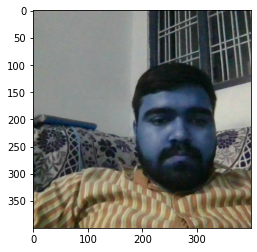

In [38]:
import json
base1=""
base2=""
f=open('image_rec.json','r')
jd=f.read()
jd=json.loads(jd)
base1=jd["img1"]
base2=jd["img2"]
f.close()
# decodeit = open('hello_level.jpeg', 'wb')
# decodeit.write(base64.b64decode(base1))
# decodeit.close()
base1 = bytes(base1[23:], 'utf-8')
im_bytes = base64.b64decode(base1)
im_arr = np.frombuffer(im_bytes, dtype=np.uint8)
img2 = cv2.imdecode(im_arr, flags=cv2.COLOR_BGR2RGB)
plt.imshow(img2)

In [19]:
with open("img2.jpeg", "rb") as img_file:
    base3 = base64.b64encode(img_file.read())
print(base3)
# im_bytes = base64.b64decode(base3)
# im_arr = np.frombuffer(im_bytes, dtype=np.uint8)
# img2 = cv2.imdecode(im_arr, flags=cv2.COLOR_BGR2RGB)
# print(img2)
# # plt.imshow(img2)

b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAYGBgYHBgcICAcKCwoLCg8ODAwODxYQERAREBYiFRkVFRkVIh4kHhweJB42KiYmKjY+NDI0PkxERExfWl98fKcBBgYGBgcGBwgIBwoLCgsKDw4MDA4PFhAREBEQFiIVGRUVGRUiHiQeHB4kHjYqJiYqNj40MjQ+TERETF9aX3x8p//CABEIBLADhAMBIgACEQEDEQH/xAAvAAEAAwEBAQAAAAAAAAAAAAAAAQIDBAUGAQEBAQEAAAAAAAAAAAAAAAAAAQID/9oADAMBAAIQAxAAAAL0xAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

In [45]:
TOLERANCE = 0.6
FRAME_THICKNESS = 3
FONT_THICKNESS = 2
MODEL = 'hog'

(2842, 2314, 3)

In [39]:
known_faces = []
unknown_faces = []

In [40]:
encoding = face_recognition.face_encodings(img1)[0]
known_faces.append(encoding)

In [41]:
locations = face_recognition.face_locations(img2, model=MODEL)
encodings = face_recognition.face_encodings(img2, locations)

In [42]:
for face_encoding, face_location in zip(encodings, locations):
    results = face_recognition.compare_faces(known_faces, face_encoding, TOLERANCE)
    print(results)

[False]


In [45]:
# function to do face reconition
class face_reco:
    
    def __init__(self):
        pass

    def base64toimg(self,img):
        img = bytes(img[23:], 'utf-8')
        im_bytes = base64.b64decode(img)
        im_arr = np.frombuffer(im_bytes, dtype=np.uint8)  # im_arr is one-dim Numpy array
        img2 = cv2.imdecode(im_arr, flags=cv2.COLOR_BGR2RGB)
#         plt.imshow(img2)
        
        return img2

    def recognize(self,img1 ,img2):
        img1=self.base64toimg(img1)
        img2=self.base64toimg(img2)
        TOLERANCE = 0.6
        MODEL = 'hog'
        known_faces = []
        results=[]
        
        encoding = face_recognition.face_encodings(img1)[0]
        known_faces.append(encoding)
        locations = face_recognition.face_locations(img2, model=MODEL)
        encodings = face_recognition.face_encodings(img2, locations)
        for face_encoding, face_location in zip(encodings, locations):
            results = face_recognition.compare_faces(known_faces, face_encoding, TOLERANCE)
        return results
    



In [46]:
import json
base1=""
base2=""
f=open('image_rec.json','r')
jd=f.read()
jd=json.loads(jd)
base1=jd["img1"]
base2=jd["img2"]
f.close()
fr=face_reco()
print(fr.recognize(base1,base2))

[True]
